# TensorFlow and Keras Lesson

In [2]:
# CPU TensorFlow
# !pip install tensorflow==2.0.0-rc1

# GPU TensorFlow
!pip install tensorflow-gpu==2.0.0

import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


build your ANN step by step, using the Sequential() class

When implementing an ANN in Keras, you'll use the following steps:
- Create a model object.
- Add layers to the model one by one.

After doing these steps, you'll end up with a deep-learning model structure. The next steps are as follows:
- Define an optimizer and compile the model.
- After compiling the model, train the model using training data.
- Evaluate the performance of the model on a test set.

1. Import Sequential Class from Keras
 - from tensorflow.keras.models import Sequential
2. Create model object
 - model = Sequential()
3. Compile the model
 - model.compile(optimizer, loss, metrics)
4. Add layers to the model
 - model.add(Dense())
5. Train the model
 - model.fit(X_train, Y_train)
6. Evaluate the model
 - model.evaluate(X_test, Y_test)

In [3]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

Load the data and do preprocessing

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

11493376/11490434 [==============================] - 0s 0us/step


Next, one-hot code your target variable using the to_categorical() function from the keras.utils module:

In [5]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

Check the size

In [6]:
X_train[0].shape

(784,)

Plot some images

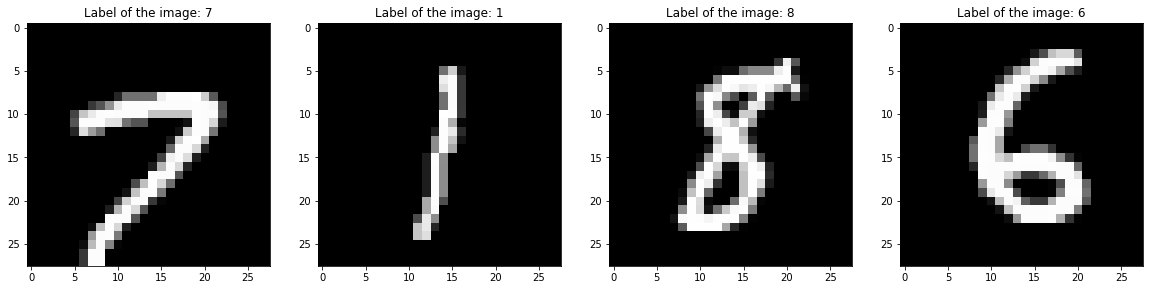

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

Defining the model - Sequential

In [8]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# The first dense layer
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(1028, activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1028)              806980    
_________________________________________________________________
dense_1 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10290     
Total params: 1,875,082
Trainable params: 1,875,082
Non-trainable params: 0
_________________________________________________________________


Compiling the model
1. The optimizer that will be used in the training: If you don't know about optimizers in deep learning, don't worry. You just need to use one in this lesson, and you'll learn about optimizers later in this module.
2. The loss function: It's necessary to specify a loss function for a model. Training algorithms use this loss function and try to minimize it during the training. This will also be covered in the next lesson.
3. The metric to measure the training performance of your model: In this example, you use the accuracy metric, because your task is a classification task and your dataset is a balanced one.

In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

Training the model
- Use 128 as the batch size. Batch size is something that you'll explore in a later lesson.
- Use 20 as the number of epochs. In deep-learning jargon, epoch means full use of all of the examples in the training data during the training of the model.

In [11]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 415us/sample - loss: 1.0429 - accuracy: 0.7816
Epoch 2/20
60000/60000 [==============================] - 19s 309us/sample - loss: 0.4243 - accuracy: 0.8923
Epoch 3/20
60000/60000 [==============================] - 18s 305us/sample - loss: 0.3409 - accuracy: 0.9061
Epoch 4/20
60000/60000 [==============================] - 18s 299us/sample - loss: 0.3028 - accuracy: 0.9157
Epoch 5/20
60000/60000 [==============================] - 18s 301us/sample - loss: 0.2777 - accuracy: 0.9225
Epoch 6/20
60000/60000 [==============================] - 19s 314us/sample - loss: 0.2586 - accuracy: 0.9275
Epoch 7/20
60000/60000 [==============================] - 18s 296us/sample - loss: 0.2431 - accuracy: 0.9323
Epoch 8/20
60000/60000 [==============================] - 18s 295us/sample - loss: 0.2297 - accuracy: 0.9354
Epoch 9/20
60000/60000 [==============================] - 18s 294us/sample - loss: 0.2181 - accuracy: 0.9

Evaluate the model

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.14310873336195945
Test accuracy: 0.9576


# TensorFlow and Keras Assignment

1. In this task, you'll build an ANN and train and test it using the MNIST data. This ANN should consist of two hidden layers and one output layer. All of the hidden layers should be dense. The first layer and the second layer should have neuron sizes of 32 and 16, respectively. Train this model for 20 epochs, and compare your training and test set performance with the example in the lesson. Is there any difference? If so, why?

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

X_train[0].shape

(784,)

In [19]:
model = Sequential()
# our first dense layer is 32
model.add(Dense(32, input_shape=(784,), activation="relu"))
# our second dense layer is 16
model.add(Dense(16, activation="relu"))
# last layer, the output layer, is 10
model.add(Dense(10, activation="softmax"))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 33us/sample - loss: 1.4684 - accuracy: 0.5551
Epoch 2/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.5988 - accuracy: 0.8411
Epoch 3/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.4360 - accuracy: 0.8792
Epoch 4/20
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3791 - accuracy: 0.8923
Epoch 5/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3474 - accuracy: 0.9011
Epoch 6/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3250 - accuracy: 0.9074
Epoch 7/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3080 - accuracy: 0.9119
Epoch 8/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2936 - accuracy: 0.9162
Epoch 9/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2817 - accuracy: 0.9200
Epoch 10/20
60

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.20925037734806537
Test accuracy: 0.9404


Lesson Results:
- train score (loss) 0.1397
- train accuracy 0.9607
- test score: 0.1431
- test accuracy: 0.9576

Example Results:
- train score (loss) 0.2063
- train accuracy 0.9411
- test score 0.2093
- test accuracy 0.9404

Both the train and test scores are pretty similar in both models. The first model had much more dense layers resulting in slightly better values for loss and accuracy.

2. In this task, build another ANN. This ANN should have five hidden layers and one output layer. All of the layers should be dense. The neuron numbers for the hidden layers should be 1024, 512, 256, 128, and 64. Train this model for 20 epochs, and test it using the same data from the previous task. Then compare your results. Is there any difference? If so, why?

In [24]:
model = Sequential()
# our first dense layer is 1024
model.add(Dense(1024, input_shape=(784,), activation="relu"))
# our second dense layer is 512
model.add(Dense(512, activation="relu"))
# our third dense layer is 256
model.add(Dense(256, activation="relu"))
# our fourth dense layer is 128
model.add(Dense(128, activation="relu"))
# our fifth dense layer is 64
model.add(Dense(64, activation="relu"))
# last layer, output layer, is 10
model.add(Dense(10, activation="softmax"))

In [25]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# setting verbose=1 prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 276us/sample - loss: 1.2869 - accuracy: 0.6790
Epoch 2/20
60000/60000 [==============================] - 15s 253us/sample - loss: 0.3790 - accuracy: 0.8932
Epoch 3/20
60000/60000 [==============================] - 15s 254us/sample - loss: 0.2882 - accuracy: 0.9162
Epoch 4/20
60000/60000 [==============================] - 15s 252us/sample - loss: 0.2430 - accuracy: 0.9283
Epoch 5/20
60000/60000 [==============================] - 15s 251us/sample - loss: 0.2103 - accuracy: 0.9386
Epoch 6/20
60000/60000 [==============================] - 15s 256us/sample - loss: 0.1871 - accuracy: 0.9456
Epoch 7/20
60000/60000 [==============================] - 15s 249us/sample - loss: 0.1659 - accuracy: 0.9516
Epoch 8/20
60000/60000 [==============================] - 15s 250us/sample - loss: 0.1505 - accuracy: 0.9559
Epoch 9/20
60000/60000 [==============================] - 16s 258us/sample - loss: 0.1358 - accuracy: 0.9

In [27]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.08592790067396126
Test accuracy: 0.9734


The test score is 0.0859 and the test accuracy is 0.9734, which are both better values than the previous models. There are more layers and they are more dense, leading to better train and test results, but the runtime was much longer. The difference in the training and test score was much larger potentially resulting in a too complex model that may be overfitting.